In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager
import os
import atlas_mpl_style as ampl
ampl.use_atlas_style(usetex=True)
ampl.set_color_cycle("Paper", 6)

/home/badea/.conda/envs/hls4ml-tutorial/lib/python3.10/site-packages/atlas_mpl_style/__init__.py:212: UserWarning: No LaTeX installation found -- atlas-mpl-style is falling back to usetex=False
  _warn.warn(


In [2]:
eosdir = '/local/d1/badea/tracker/data/smartpix/parquet/dataset12/unflipped'

truth9 = pd.DataFrame()

for f in os.listdir(eosdir):
    if 'recon' in f:
        continue
    truth9 = pd.concat([truth9,pd.read_parquet(os.path.join(eosdir,f)),])

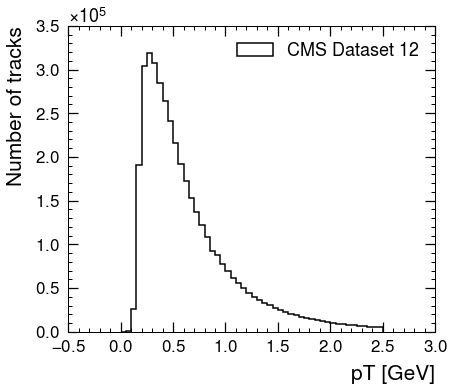

In [3]:
# make plot
fig = plt.figure(figsize=(6, 5))
ax = plt.axes([0.1, 0.1, 0.85, 0.85])

lw=1.5
rasterized = False
# draw data
ax.hist(truth9.pt, 
        bins=np.linspace(0,2.5,51),
        alpha=1.0, 
        lw=lw,
        ls="-",
        histtype="step",
        label="CMS Dataset 12",
        color="black",
        rasterized=rasterized)

# set labels
ax.set_xlabel("pT [GeV]", fontsize=21, labelpad=9, horizontalalignment='right', x=1.0)
ax.set_ylabel("Number of tracks", fontsize=21, labelpad=9, horizontalalignment='right', y=1.0)

# set limits
# ax.set_xlim(0,3500)
# ax.set_ylim(0, 0.22)

# tick params
tick_params_major = {"which"     : "major",
                     "length"    : 10,
                     "width"     : 1.25,
                     "direction" : "in",
                     "right"     : True,
                     "top"       : True,
                     "labelsize" : 17,
                     "pad"       : 8}
tick_params_minor = {"which"     : "minor",
                     "length"    : 4,
                     "width"     : 1,
                     "direction" : "in",
                     "right"     : True,
                     "top"       : True,
                     "labelsize" : 15}

# ax.xaxis.set_minor_locator(AutoMinorLocator(5))
# ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(**tick_params_major)
ax.tick_params(**tick_params_minor)
plt.locator_params(axis='y', nbins=8)
plt.locator_params(axis='x', nbins=8)

# save
# plt.yscale("log")
plt.legend()
plt.show()
# outFileName = var+".pdf"
# plt.savefig(outFileName, bbox_inches="tight") # _noFirstLayer